## Subjective Value Reformulated 2
Only thought through value in positive space.

Ambiguity is the proportion of the win and loss spaces that is obscured. 
* A = 0.5 means 50% of both the win and lose spaces are obscured.

Beta is more interpretable when defined as the proportion of ambiguity range a person assumes to be "win". 
* Beta = 1, belief that 100% of ambiguous space is "win" (ambiguity seeking)
* Beta = 0.5, belief that 50% of ambiguous space is "win" (ambiguity neutral)
* Beta = 0, belief that 0% of ambiguous space is "win" (ambiguity averse)

Alpha is akin to decribing how much of the risk of losing applies to you or not: 
* Alpha = 1, "level risk doesn't matter -- I feel like I'm definitely going to win", (risk seeking)
* Alpha = 0.5, means the risk matters (risk neutral)
* Alpha = 0, "level of risk doesn't matter -- I'm definitely going to lose" (risk averse)

$$p : [0,1]$$
$$α : [0,1]$$ but pure tolerance to risk is at $α=.5$.
$$β : [0,1]$$
but pure tolerance to ambiguity is at $β=.5$.
$$A : [0,1]$$

$$ p_s(p | β, A)=   \left\{
\begin{array}{ll}
      p &: \space A=0 \\
      A(p + β) &: A > 0 \\
\end{array} 
\right.  $$


$$SV(v | α, p_s)=v(p_s + (1-p_s)(2α-1))$$

### SV of objective value given alpha and subjective probability
* value(subjective probability of winning + (subjective probability of losing)(transformed alpha))
* Alpha would normally fall into a -1 to 1 range instead of a proportion 
* By multiplying alpha by 2 and subtracting 1, we bring alpha back from proportional to -1,1 space

In [41]:
import numpy as np
import pylab as plt

In [42]:
def subjective_prob(p, amb, beta, blending=1):
    #calculates subjective probability 
    """
    Inputs:
    - v = objective value in money space
    - amb = proportion of obscured space
    - beta = ambiguity tolerance, range [0,1]
    - blending = position of ambiguous space
    
    Output:
    - subjective probability of lottery option
    """
    if amb == 0:
        return p
    return amb*(p+beta)


def sv(v, alpha, subjective_prob):
    #alpha range [0,1]
    """
    Inputs
    - v = objective value of lottery option
    - alpha = risk tolerance
    - subjective_prob
    
    Ouput
    - Money value for point of subjective equality for v given alpha, beta, and ambiguity
    * Note: Same as subjective equality safe value
    """
    return v*(subjective_prob + (alpha*2-1)*(1-subjective_prob))

def sv_questplus(v, params):
    """
    Inputs
    - v = objective value of lottery option
    - params = input from QuestPlus
    
    Ouput
    - Alpha
    - Beta
    - Probability
    - Ambiguity
    """
    alpha, beta, probability, ambiguity = params
    return sv(v, alpha, subjective_prob(probability, ambiguity, beta))

In [43]:
amb = 0.5 #proportion of obscured space 

print("Risk Neutral", "Ambiguity Neutral")
print("- >50% because there's still 50% that's definitely winnings")
print(sv(50, .5, subjective_prob(1, amb, .5)), subjective_prob(1, amb, 0.5))
print("")

print("Risk Neutral", "Ambiguity Averse")
print("- 50% because you feel sure the ambiguity is against you")
print(sv(50, .5, subjective_prob(1, amb, 0)), subjective_prob(1, amb, 0))
print("")

print("Risk Averse", "Ambiguity Averse")
print("- 25% because you feel like the 50% is only a half likely win")
print(sv(50, .25, subjective_prob(1, amb, 0)), subjective_prob(1, amb, 0))
print("")

print("Risk Seeking", "Ambiguity Averse")
print("- 100% because you feel like the apparent 50% shot is all you need to win it big")
print(sv(50, 1, subjective_prob(1, amb, 0)), subjective_prob(1, amb, 0))

Risk Neutral Ambiguity Neutral
- >50% because there's still 50% that's definitely winnings
37.5 0.75

Risk Neutral Ambiguity Averse
- 50% because you feel sure the ambiguity is against you
25.0 0.5

Risk Averse Ambiguity Averse
- 25% because you feel like the 50% is only a half likely win
12.5 0.5

Risk Seeking Ambiguity Averse
- 100% because you feel like the apparent 50% shot is all you need to win it big
50.0 0.5


In [44]:
beta = .5

print("Reasonable alpha")
print(sv(50, .5, 1))
print(sv(50, .5, .5))
print(sv(50, .7, .5))
print(sv(50, .3, .5))
print("Ambiguity")
print(sv(50, .5, subjective_prob(1, amb, beta)), subjective_prob(1, amb, beta))
print(sv(50, .5, subjective_prob(.5, amb, beta)))
print(sv(50, .7, subjective_prob(.5, amb, beta)))
print(sv(50, .3, subjective_prob(.5, amb, beta)))
print("Low Alpha")
print(sv(50, .2, 1))
print(sv(50, .2, .5))
print(sv(50, .4, .5))
print(sv(50, .1, .5))
print("Ambiguity")
print(sv(50, .2, subjective_prob(1, amb, beta)))
print(sv(50, .2, subjective_prob(.5, amb, beta)))
print(sv(50, .4, subjective_prob(.5, amb, beta)))
print(sv(50, .1, subjective_prob(.5, amb, beta)))
print("High Alpha")
print(sv(50, .9, 1))
print(sv(50, .9, .5))
print(sv(50, 1, .5))
print(sv(50, 1, .5))
print("Ambiguity")
print(sv(50, .9, subjective_prob(1, amb, beta)))
print(sv(50, .9, subjective_prob(.5, amb, beta)))
print(sv(50, 1, subjective_prob(.5, amb, beta)))
print(sv(50, 1, subjective_prob(.5, amb, beta)))

Reasonable alpha
50.0
25.0
35.0
15.0
Ambiguity
37.5 0.75
25.0
35.0
15.0
Low Alpha
50.0
10.0
20.0
4.999999999999999
Ambiguity
30.0
10.0
20.0
4.999999999999999
High Alpha
50.0
45.0
50.0
50.0
Ambiguity
47.5
45.0
50.0
50.0


In [45]:
amb = .5
print("Reasonable alpha")
print(sv(50, .5, 1))
print(sv(50, .5, .5))
print(sv(50, .7, .5))
print(sv(50, .3, .5))
print("Ambiguity")
print(sv(50, .5, subjective_prob(1, amb, beta)), subjective_prob(1, amb, beta))
print(sv(50, .5, subjective_prob(.5, amb, beta)))
print(sv(50, .7, subjective_prob(.5, amb, beta)))
print(sv(50, .3, subjective_prob(.5, amb, beta)))
print("Low Alpha")
print(sv(50, .2, 1))
print(sv(50, .2, .5))
print(sv(50, .4, .5))
print(sv(50, .1, .5))
print("Ambiguity")
print(sv(50, .2, subjective_prob(1, amb, beta)))
print(sv(50, .2, subjective_prob(.5, amb, beta)))
print(sv(50, .4, subjective_prob(.5, amb, beta)))
print(sv(50, .1, subjective_prob(.5, amb, beta)))
print("High Alpha")
print(sv(50, .9, 1))
print(sv(50, .9, .5))
print(sv(50, 1, .5))
print(sv(50, 1, .5))
print("Ambiguity")
print(sv(50, .9, subjective_prob(1, amb, beta)))
print(sv(50, .9, subjective_prob(.5, amb, beta)))
print(sv(50, 1, subjective_prob(.5, amb, beta)))
print(sv(50, 1, subjective_prob(.5, amb, beta)))

Reasonable alpha
50.0
25.0
35.0
15.0
Ambiguity
37.5 0.75
25.0
35.0
15.0
Low Alpha
50.0
10.0
20.0
4.999999999999999
Ambiguity
30.0
10.0
20.0
4.999999999999999
High Alpha
50.0
45.0
50.0
50.0
Ambiguity
47.5
45.0
50.0
50.0


In [61]:
import numpy as np
arange = np.arange
ambiguity_space = [.24, .5, .74]
probability_space = [.13, .25, .38, .5, .75]
steps = 4

def round_fiddy(n):
    return np.ceil(n * 2)/2

def make_sample_sv_ranges(alpha, beta, prob, amb, steps, value_max=50):
    """
    Inputs
    - alpha
    - beta
    - prob
    - amb
    - steps = number of steps per half side
    - value_max = maximum possible lottery value
    
    Output
    - 
    """
    #value equivelent to lottery if prob = 1
    sv_se = sv(value_max, alpha, subjective_prob(prob, amb, beta)) #previously SV_Max
    sv_min = max(0.5, round_fiddy(sv_se/2)) #safe options in money space
    
    #make room to exclude sv_min (safe) from the range
    ss = (value_max - sv_min)/(2 * (steps + 0.5) - 1) 
    
    space = arange(sv_min, value_max + ss/2, ss) #creates points along money space for lottery values
    #slices off safe value at start, round to nearest $0.50
    space = [round_fiddy(v) for i, v in enumerate(space) if i != 0]
    sv_half = (space[-1] + space[0])/2 # sv_half is NOT the safe value in this: sv_min is
    return space, sv_min, sv_half

In [62]:
make_sample_sv_ranges(1, .1, .5, .05, 4)

([28.5, 31.5, 34.5, 37.5, 41.0, 44.0, 47.0, 50.0], 25.0, 39.25)

In [63]:
alphas = arange(.01, 1.01, .025)
alphas = np.round(alphas, 2)
    
svs = []
moneys = []
beta = 0.5
amb = 0.0
prob = 0.5

lot_svs_lines = []
lot_money_lines = []
lot_svs_lines_recomp = []
for i in range(8):
    lot_svs_lines.append([])
    lot_money_lines.append([])
    lot_svs_lines_recomp.append([])
safe_svs_line = []
safe_money_line = []
sv_half_money_line = []
space = None
for alpha in alphas:
    space, safe, sv_half = make_sample_sv_ranges(alpha, beta, prob, amb, 4)
    sv_half_money_line.append(sv_half)
    safe_money_line.append(safe)
    for i, lott in enumerate(space):
        lot_money_lines[i].append(lott)

### Compare to Figure 1 from previous RDM

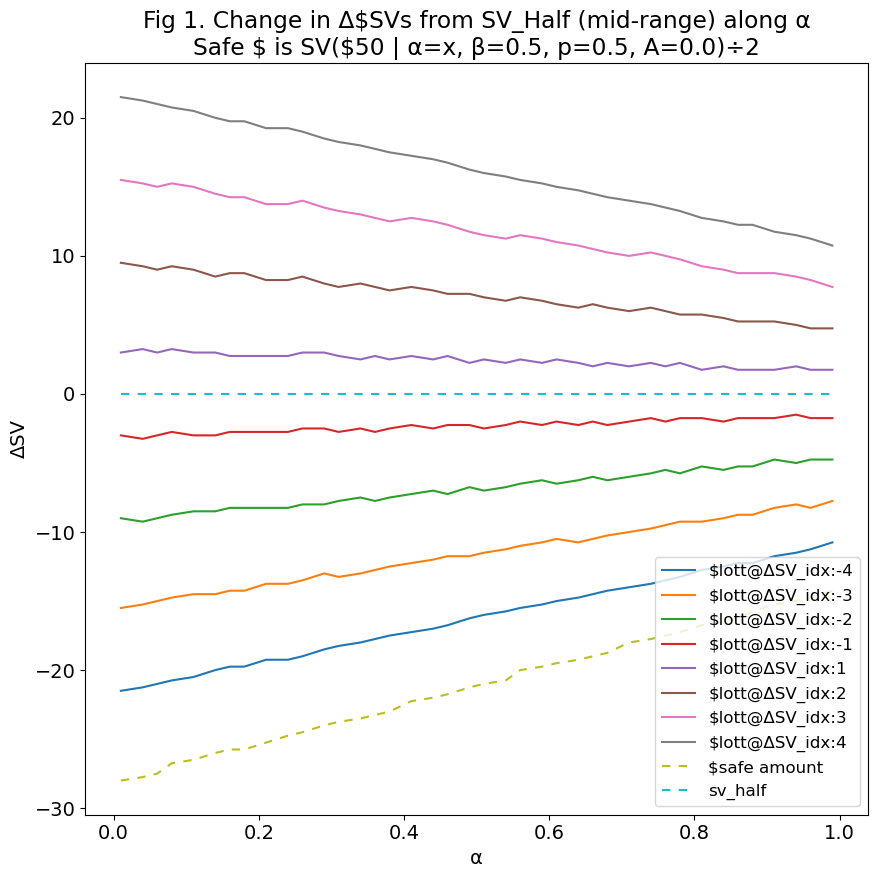

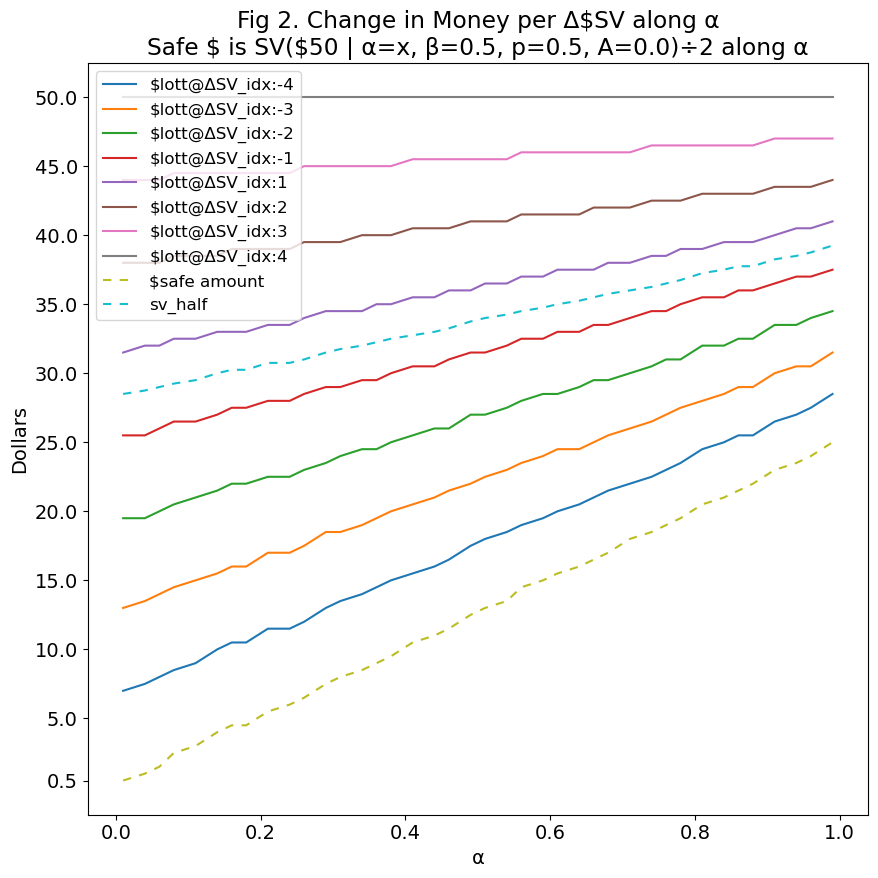

In [68]:
#same, but compared to sv_half, which *is not safe value*
import pylab as plt
import numpy as np

# SVs
plt.figure(figsize = (9,9))
for i, s in enumerate(space):
    idx = i-4
    if idx >= 0:
        idx += 1
    plt.plot(alphas, np.array(lot_money_lines)[i] - np.array(sv_half_money_line), 
             label = "$lott@ΔSV_idx:" + str(idx))
plt.plot(alphas, np.array(safe_money_line) - np.array(sv_half_money_line), dashes = [4,4], label = "$safe amount")
plt.plot(alphas, np.array(sv_half_money_line) - np.array(sv_half_money_line), dashes = [4,4], label = "sv_half")
plt.rcParams.update({'font.size': 12}) #size for axes
plt.legend()
plt.xlabel("α")
plt.ylabel("ΔSV")
plt.rcParams.update({'font.size': 14}) #size for title
plt.title("Fig 1. Change in Δ$SVs from SV_Half (mid-range) along α\nSafe \$ is SV($50 | α=x, β={0}, p={1}, A={2})÷2".format(beta, prob, amb))
plt.savefig("new_fig1.jpg", bbox_inches='tight')
plt.tight_layout()
plt.show()

#money
plt.figure(figsize = (9,9))
for i, s in enumerate(space):
    idx = i-4
    if idx >= 0:
        idx += 1
    plt.plot(alphas, np.array(lot_money_lines)[i], label = "$lott@ΔSV_idx:" + str(idx))
plt.plot(alphas, np.array(safe_money_line), dashes = [4,4], label = "$safe amount")
plt.plot(alphas, np.array(sv_half_money_line), dashes = [4,4], label = "sv_half")
plt.rcParams.update({'font.size': 12}) #size for axes
plt.xlabel("α")
plt.ylabel("Dollars")
money = np.arange(0., 50.5, 5)
money[0] = .5
plt.yticks(money)
plt.legend(loc = 'upper left')
plt.rcParams.update({'font.size': 14}) #size for title
plt.title("Fig 2. Change in Money per Δ$SV along α\nSafe \$ is SV($50 | α=x, β={0}, p={1}, A={2})÷2 along α".format(beta, prob, amb))
plt.savefig("new_fig2.jpg", bbox_inches='tight')
plt.tight_layout()
plt.show()

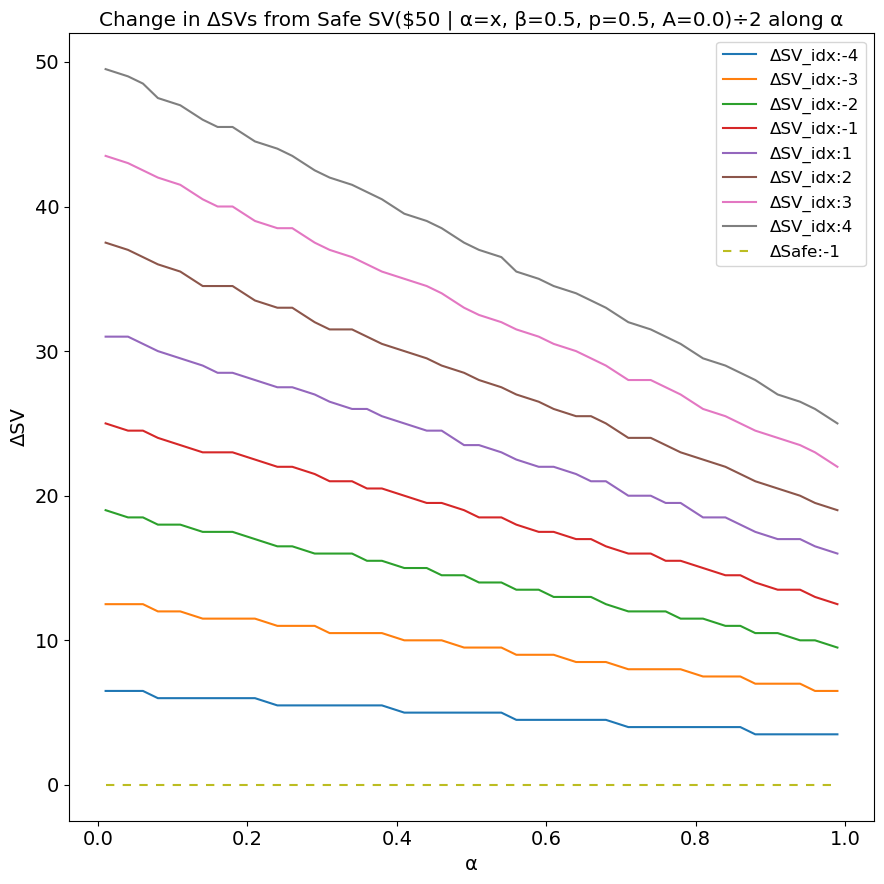

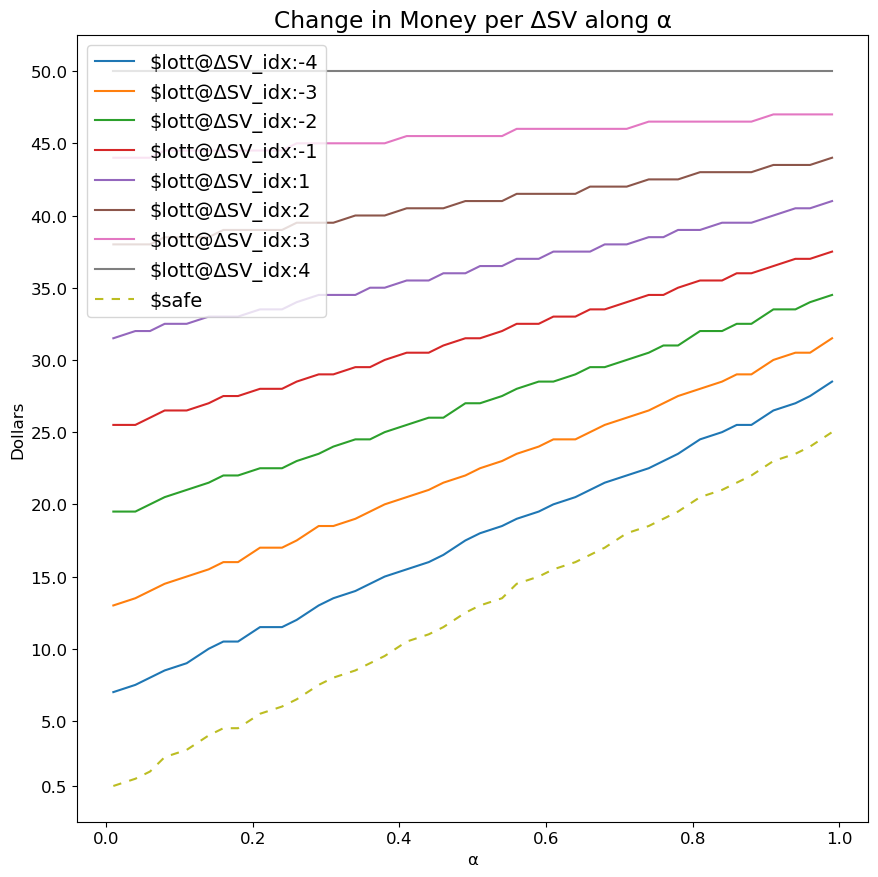

In [66]:
import pylab as plt
import numpy as np
# SVs
plt.figure(figsize = (9,9))
for i, s in enumerate(space):
    idx = i-4
    if idx >= 0:
        idx += 1
    plt.plot(alphas, np.array(lot_money_lines)[i] - np.array(safe_money_line), 
             label = "ΔSV_idx:" + str(idx))
plt.plot(alphas, np.array(safe_money_line) - np.array(safe_money_line), dashes = [4,4], 
         label = "ΔSafe:-1")
plt.rcParams.update({'font.size': 12}) #size for axes
plt.legend()
plt.xlabel("α")
plt.ylabel("ΔSV")
plt.rcParams.update({'font.size': 12}) #size for title
plt.title("Change in ΔSVs from Safe SV($50 | α=x, β={0}, p={1}, A={2})÷2 along α".format(beta, prob, amb))
plt.tight_layout()
plt.show()

# money
plt.figure(figsize = (9,9))
for i, s in enumerate(space):
    idx = i - 4
    if idx >= 0:
        idx += 1
    plt.plot(alphas, np.array(lot_money_lines)[i], label = "$lott@ΔSV_idx:" + str(idx))
plt.plot(alphas, np.array(safe_money_line), dashes = [4,4], label = "$safe")
plt.rcParams.update({'font.size': 14}) #size for axes
plt.xlabel("α")
plt.ylabel("Dollars")
money = np.arange(0., 50.5, 5)
money[0] = .5
plt.yticks(money)
plt.legend(loc = 'upper left')
plt.rcParams.update({'font.size': 14}) #size for title
plt.title("Change in Money per ΔSV along α")
plt.tight_layout()
plt.show()

# Make schedule

In [51]:
alpha = 0.4
beta = 0.2
steps = 4
random = np.random

trials = {"crdm_lott_sv":[], "crdm_safe_sv":[], "crdm_lott":[], "crdm_sure_amt":[], 
          "crdm_lott_p":[], "crdm_amb_lev":[], "crdm_delta_sv":[], 
          "crdm_domain":[], "crdm_sv_half":[], "crdm_quad_idx":[]}
parseInt = int


def append_trial(trials, alpha, beta, safe_sv, lott_sv, lott, safe, prob, amb, sv_half, domain, choice_idx):
    trials["crdm_lott_sv"].append(lott_sv)
    trials["crdm_safe_sv"].append(safe_sv)
    trials["crdm_lott"].append(lott)
    trials["crdm_sure_amt"].append(safe)
    trials["crdm_lott_p"].append(prob)
    trials["crdm_amb_lev"].append(amb)
    trials["crdm_delta_sv"].append(lott_sv-sv_half)
    trials["crdm_sv_half"].append(sv_half)
    trials["crdm_domain"].append(domain)
    trials["crdm_quad_idx"].append(choice_idx)


def generate_trials(trials, alpha, beta, steps):
    # trials per unique probability and ambiguity
    trials_per = 9  
    choice_idxs = [0, 1, 2, 3, 3.5, 4, 5, 6, 7]
    delta_idx = arange(8)
    ambiguity_space = [0.24, 0.5, 0.74]
    probability_space = [0.13, 0.25, 0.38, 0.5, 0.75]
    for prob in probability_space: # probability trials, no ambiguity
        svs, sv_min, sv_half = make_sample_sv_ranges(alpha, beta, prob, 0, steps)
        
        for tidx in range(trials_per):
            choice_idx = choice_idxs[tidx]
            if (choice_idx != parseInt(choice_idx)):
                inty = parseInt(choice_idx)
                odds = choice_idx-parseInt(choice_idx)
                choice_idx = random.choice([inty,inty+1], p=[1-odds, odds])            
            subspace_sv = svs[choice_idx]
            lott_sv = subspace_sv
            safe_sv = sv_min
            lott = lott_sv
            safe = safe_sv            
            append_trial(trials, alpha, beta, safe_sv, lott_sv, lott, safe, prob, 0, sv_half, 1, choice_idx)

    for amb in ambiguity_space: # ambiguity trials, prob at 0.5
        svs, sv_min, sv_half = make_sample_sv_ranges(alpha, beta, 0.5, amb, steps)
        
        for tidx in range(trials_per):
            choice_idx = choice_idxs[tidx]
            if (choice_idx != parseInt(choice_idx)):
                inty = parseInt(choice_idx)
                odds = choice_idx - parseInt(choice_idx)
                choice_idx = random.choice([inty,inty + 1], p = [1 - odds, odds])
            subspace_sv = svs[choice_idx]
            lott_sv = subspace_sv
            safe_sv = sv_min
            lott = lott_sv
            safe = safe_sv
            append_trial(trials, alpha, beta, safe_sv, lott_sv, lott, safe, 0.5, amb, sv_half, 1, choice_idx)
generate_trials(trials, alpha, beta, steps)

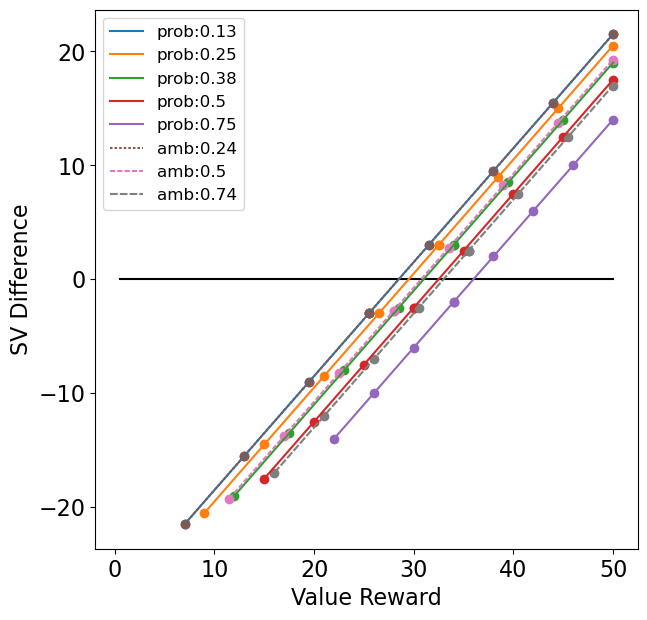

In [52]:
import pandas as pd
import pylab as plt

df = pd.DataFrame(trials)
gain = df.query("crdm_domain == 1")
plt.figure(figsize = (7,7))
plt.plot([0.5, 50], [0, 0], color = "black")
prob_trials = gain.query("crdm_amb_lev == 0")
prob = np.unique(prob_trials["crdm_lott_p"].values)

for p in prob:
    trial_set = prob_trials.query("crdm_lott_p == @p")
    money = trial_set["crdm_lott"].values
    idx = np.argsort(money)
    sva = trial_set["crdm_delta_sv"].values
    plt.plot(money[idx], sva[idx], label = "prob:" + str(p))
    plt.scatter(money[idx], sva[idx])
amb_trials = gain.query("crdm_amb_lev != 0")
amb = np.unique(amb_trials["crdm_amb_lev"].values)
for a in amb:
    trial_set = amb_trials.query("crdm_amb_lev == @a")
    money = trial_set["crdm_lott"].values
    idx = np.argsort(money)
    sva = trial_set["crdm_delta_sv"].values
    plt.plot(money[idx], sva[idx], label = "amb:" + str(a), dashes = [5*a, 1])
    plt.scatter(money[idx], sva[idx])
plt.xlabel("Value Reward")
plt.ylabel("SV Difference")
plt.rcParams.update({'font.size': 12})
plt.legend()
plt.show()

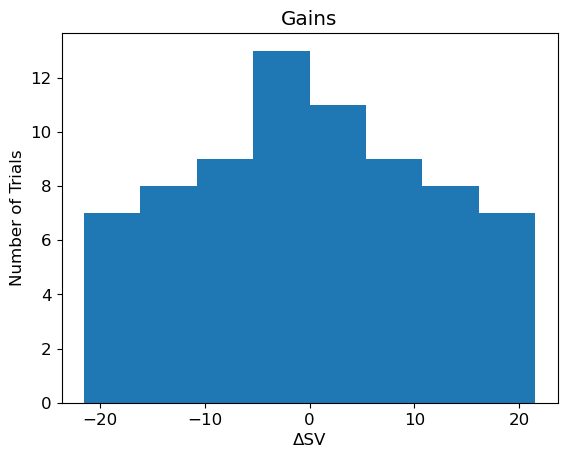

In [53]:
import pylab as plt
import pandas as pd
df = pd.DataFrame(trials)

bins = 8
gain = df.query("crdm_domain == 1")["crdm_delta_sv"].values
plt.hist(gain, bins = bins)
plt.xlabel("ΔSV")
plt.ylabel("Number of Trials")
plt.title("Gains")
plt.show()